In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import os
import sys

module_path = os.path.abspath('../') # root directory
if module_path not in sys.path:
    sys.path.append(module_path)


### Import data

In [4]:
flare_metrics_df = pd.read_csv(module_path+"\\data\\flare_metrics_df.csv")
flare_metrics_df.head()

,Address,Total Stake,Owner Stake,Delegators Stake,Free Space,Delegators,Uptime,Fee
0,8qSyua2WVQ4uNRc1wwPKmSUWY421bifiq,199949972,30000000,169949972,50028,375,100.00%,10.0
1,MfzBQ6MbriE31UWm9NjSnEgLiR1cAkEnN,199952410,29990100,169962310,47590,320,99.99%,10.0
2,A7jk7Z5GA2aVe5ecuupNXWtSLfVjLDWFC,199879725,30000000,169879725,120275,246,99.98%,7.5
3,EgJba99Q5iDcL81A27E111WANn9eZNj4v,49264614,3500000,45764614,3235386,210,100.00%,20.0
4,2hCHs6H4Vde8mdGGKidMvT4Fjit7goCBT,44999895,3000000,41999895,105,198,98.15%,2.0


- To check the number of validators:

In [5]:
flare_metrics_df['Total Stake'].to_numpy().shape

(94,)

In [6]:
flare_metrics_df['Delegators'].to_numpy()

array(['375', '320', '246', '210', '198', '186', '170', '134', '122',
       '122', '105', '96', '91', '88', '86', '78', '78', '77', '77', '69',
       '65', '63', '62', '62', '60', '59', '56', '56', '55', '54', '51',
       '48', '45', '38', '38', '37', '37NO REWARDS', '37', '34', '33',
       '32', '30', '29', '28', '27', '26', '26NO REWARDS', '26', '24',
       '24', '24', '23', '23', '23', '21', '20', '19', '18', '17', '16',
       '15', '15', '15', '15', '15', '14NO REWARDS', '14', '14', '13',
       '13', '13', '13', '11NO REWARDS', '11NO REWARDS', '11', '10', '10',
       '8NO REWARDS', '8', '7', '7', '6', '3', '3', '2', '2', '2', '1',
       '1', '0', '0NO REWARDS', '0', '0', '0'], dtype=object)

In [8]:
delegators = []

for entry in flare_metrics_df['Delegators']:
    new_entry = []
    if 'NO REWARDS' in entry:
        new_entry = entry.split("NO REWARDS")[0]
    else:
        new_entry = entry
        
    delegators.append(int(new_entry))
    
flare_metrics_df['Delegators'] = delegators

flare_metrics_df

,Address,Total Stake,Owner Stake,Delegators Stake,Free Space,Delegators,Uptime,Fee
0,8qSyua2WVQ4uNRc1wwPKmSUWY421bifiq,199949972,30000000,169949972,50028,375,100.00%,10.0
1,MfzBQ6MbriE31UWm9NjSnEgLiR1cAkEnN,199952410,29990100,169962310,47590,320,99.99%,10.0
2,A7jk7Z5GA2aVe5ecuupNXWtSLfVjLDWFC,199879725,30000000,169879725,120275,246,99.98%,7.5
3,EgJba99Q5iDcL81A27E111WANn9eZNj4v,49264614,3500000,45764614,3235386,210,100.00%,20.0
4,2hCHs6H4Vde8mdGGKidMvT4Fjit7goCBT,44999895,3000000,41999895,105,198,98.15%,2.0
...,...,...,...,...,...,...,...,...
89,JHnfNSNgSThSJEFG8aq99FRAE4a7Ko7UP,4000000,4000000,0,56000000,0,100.00%,20.0
90,CeX1NfNPHCdaJXUVtkLysShaZCtsHRK3D,2172490,2172490,0,30414860,0,100.00%,20.0
91,KppZbRMtfNTQZGdmHdkbHTJHgNPBCNxJj,1300000,1300000,0,18200000,0,100.00%,22.0
92,J8Zbi3b3AjTEUmHdE4KSApEU1U36iaeDS,8000000,8000000,0,112000000,0,100.00%,18.0


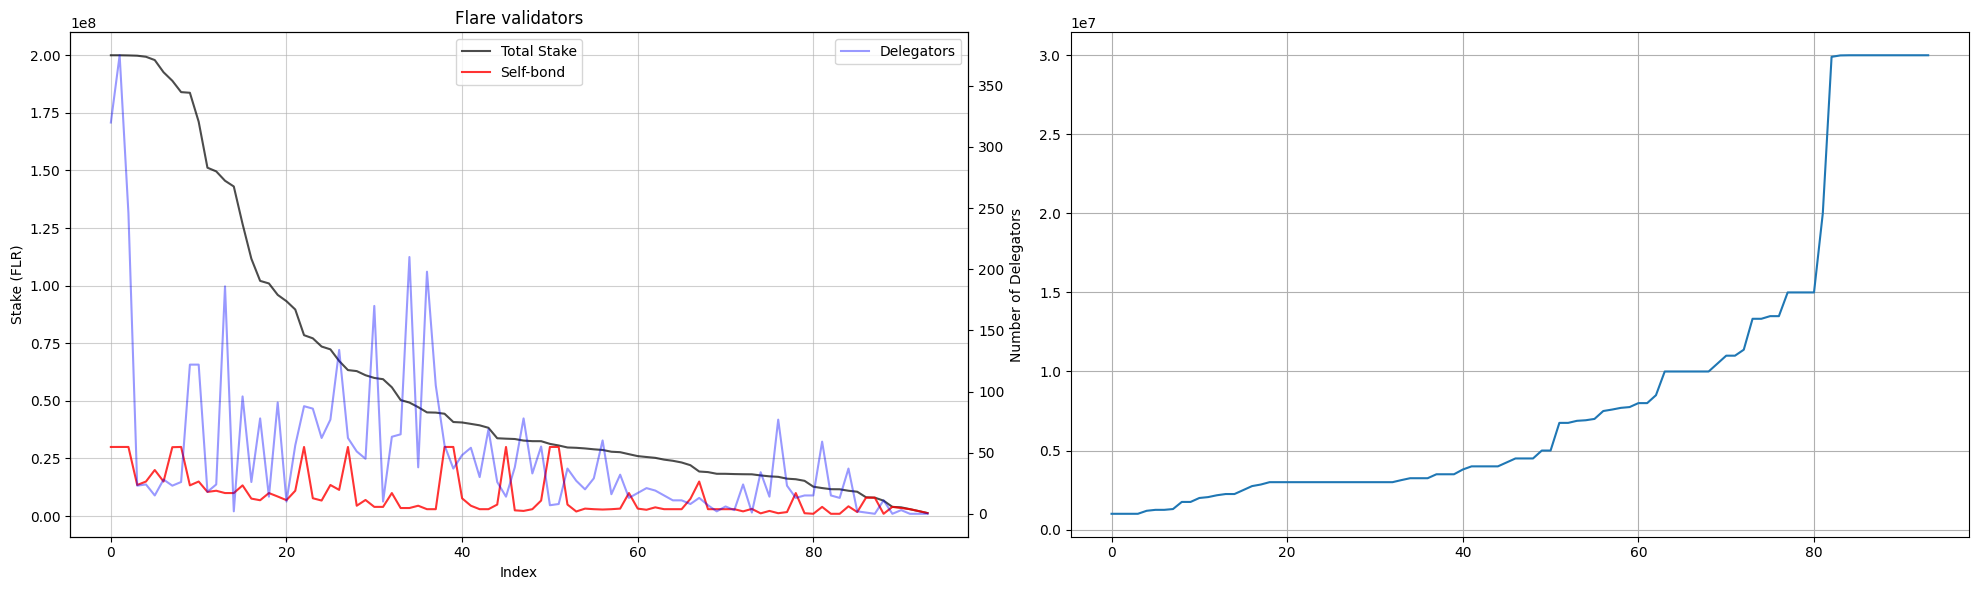

In [9]:
# Plot results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

index = np.arange(flare_metrics_df['Total Stake'].to_numpy().shape[0])
sorted_df = flare_metrics_df.sort_values(by='Total Stake', ascending=False)

ax[0].plot(index, sorted_df['Total Stake'], label='Total Stake', alpha = 0.7, color = 'black')
ax[0].plot(index, sorted_df['Owner Stake'], label='Self-bond', alpha = 0.8, color = 'red')
#ax[0].plot(index, sorted_df['Owner Stake'], label='Self-bond', alpha = 0.8, color = 'red')

#ax[0].plot(new_df.index, new_df['new_strategy'], label=f"{mal_users} malicious weight", alpha = 0.6, color = 'darkorange')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Stake (FLR)')
ax[0].set_title('Flare validators')
ax[0].grid(alpha = 0.6)
ax[0].legend(loc = 'upper center')

# Create a twin axis for the second plot (ax[1])
ax2 = ax[0].twinx()

# Plot on the second axis (ax2)
ax2.plot(index, sorted_df['Delegators'], label='Delegators', alpha=0.4, color='blue')
ax2.set_ylabel('Number of Delegators')
ax2.legend(loc='upper right')
# Adjust layout to prevent overlap
fig.tight_layout()



ax[1].plot(index, np.sort(sorted_df['Owner Stake']))
ax[1].grid()



In [10]:
sorted_df.head(20)

,Address,Total Stake,Owner Stake,Delegators Stake,Free Space,Delegators,Uptime,Fee
1,MfzBQ6MbriE31UWm9NjSnEgLiR1cAkEnN,199952410,29990100,169962310,47590,320,99.99%,10.0
0,8qSyua2WVQ4uNRc1wwPKmSUWY421bifiq,199949972,30000000,169949972,50028,375,100.00%,10.0
2,A7jk7Z5GA2aVe5ecuupNXWtSLfVjLDWFC,199879725,30000000,169879725,120275,246,99.98%,7.5
52,ECqqsWu9jpUvZgPyf9yPZZcyWmJjWyN1T,199760940,13500000,186260940,239060,23,100.00%,20.0
50,5JkXthgpWVDq6utrtV1YVG7aspsHjhezM,199293636,15000000,184293636,706364,24,99.99%,10.0
63,N3GDYNsVNMxYTW4ULzrfRZpy3tRnhxKSQ,197864565,20000000,177864565,2135435,15,100.00%,10.0
43,4zWvBNmsbaS9UKQf6wcWgWGWRfitcGAuV,192580136,14999995,177580141,7419864,28,100.00%,10.0
53,MWNqxgXd8itY143jaNyq8aMYTeV1RXJgS,188890283,29900091,158990192,11109717,23,100.00%,10.0
46,LxpVHRQAYXPRf7q5oz1iT4N1z9XHz5rHU,183958601,29999900,153958701,16041399,26,100.00%,10.0
8,5V2bQbryZTU4pAe59KNHNBru1BwEfcXqg,183679514,13333334,170346180,16320486,122,99.98%,15.0


In [11]:
self_bond = sorted_df['Owner Stake'].to_numpy()

sorted_df.describe()

,Total Stake,Owner Stake,Delegators Stake,Free Space,Delegators,Fee
count,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,94.000000,94.000000
mean,5.994426e+07,8.872598e+06,5.107167e+07,3.906650e+07,49.638298,16.611702
std,5.931436e+07,9.067170e+06,5.460654e+07,4.843237e+07,66.006329,9.739387
min,1.300000e+06,1.000000e+06,0.000000e+00,1.050000e+02,0.000000,2.000000
25%,1.835325e+07,3.000000e+06,1.468620e+07,4.515541e+06,13.000000,12.000000
50%,3.310720e+07,4.500000e+06,2.687189e+07,1.980915e+07,26.000000,17.500000
75%,7.624310e+07,1.087500e+07,6.482804e+07,4.848218e+07,61.500000,20.000000
max,1.999524e+08,3.000001e+07,1.862609e+08,1.806541e+08,375.000000,100.000000
